In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("D5.ipynb")

# COGS 118A: Discussion Lab 5 (2 points)

### Instructions: 
You are responsible for making sure you pass all public tests on Gradescope. When you submit, you __must__ submit your jupyter notebook file __and__ the record.txt file. __If you do not do this, you will not receive credit for this assignment__.


For some of these questions, you'll have to import packages yourself. In this lab we will be focusing on Logistic Regression and building your intuition behind model selection (hyper parameter selection) and algorithm selection through different forms of k-fold Cross Validation. 

### Generate A Toy Classification Dataset

We can use `make_classification` to generate a random n-class classification problem. 

In [ ]:
# Setup for JupyterQuiz
from quiz import display_quiz, record_quiz, check_quiz_answer, show_chosen_option
from IPython.core.display import display, Javascript, HTML

import numpy as np
import sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


D6_path = "https://raw.githubusercontent.com/COGS118A/DiscussionLabExercises/main/D6/"

# Load the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(f"The shape of our data:\nX_train: {X_train.shape}\nX_test: {X_test.shape}" \
      f"\ny_train: {y_train.shape}\ny_test: {y_test.shape}")

## Logistic Regression

### Why use Logistic Regression?

Logistic Regression is a classification model with ease of implementation, training efficiency, and **high interpretability**.

Interpretability can be thought of as the "explainability of our model's predictions". If our model classifies a medical patient as positive for some disease, we likely want to know **how and why** the model came to that conclusion. While some other algorithms may achieve better classification accuracy (on *some* problems/datasets), logistic regression provides us with model coefficients as indicators of feature importantance **and** allows us to set probability thresholds for positive predictions (to control how many False Positives or False Negatives we will allow for our specific use case).

**This is the advantage of Logistic Regression!**


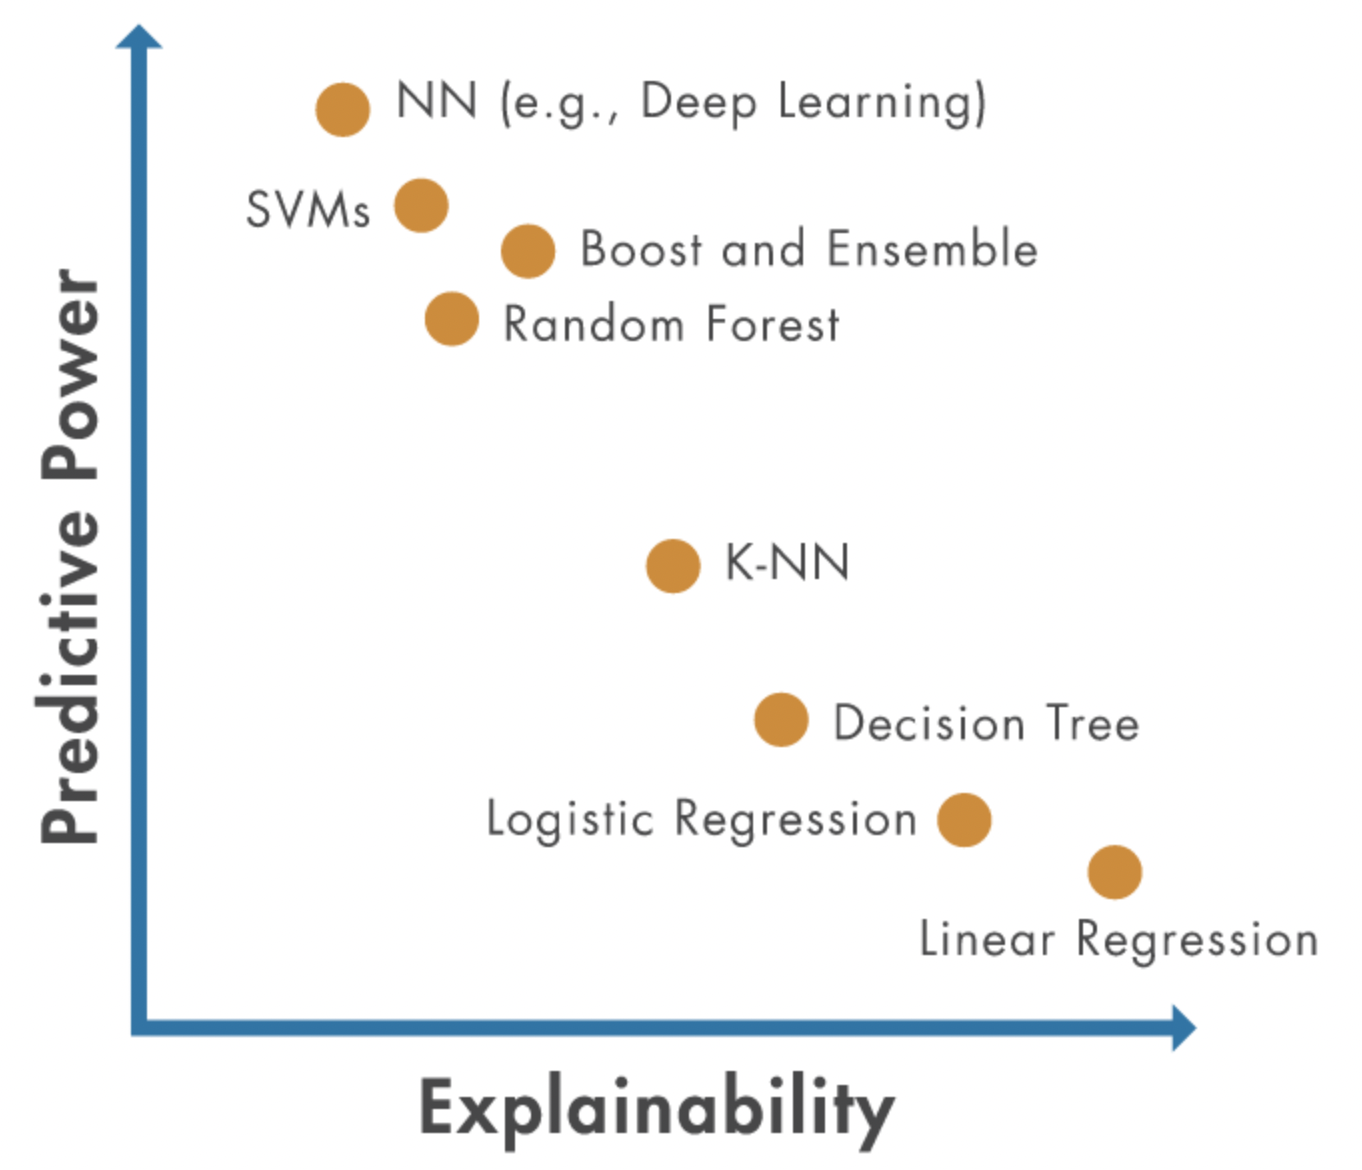

## Q1: Train a Logistic Regression Model

To start, train and test a simple logistic regression model using your train-test split without using any cross-validation.

Please use the `sklearn.linear_model.LogisticRegression`. You can refer to the documentation about this method [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

##### Model Settings (these are defaults, but practice using these arguments):
- C - 1
- random_state = 0
- penalty = "l2"

You should evaluate your model's performance using the model's `.score()` method. Save the score to a variable named `score` for testing.

In [ ]:
# Import Logistic Regression here
...

clf = ...
score = ...

In [ ]:
grader.check("Train Logistic Regressor")

## Q2: Review: ROC Curves

### Q2.1: Plot an ROC Curve for your Classifier

Plot the ROC curve of your model:
- `.predict_proba()` to generate probabilty predictions from your model, on the test set `X_test`. You may find that the output is a 2-d array, when the expected output is 1-D. Think about how you can turn the binary case into a TP and FP case.
- `roc_curve()` and `roc_auc_score` are useful too! (of course)


Save the ROC AUC (Area under the Receiver Operating Characteristic Curve) as a variable named `roc_auc`. Print this value.
- Use `sklearn.metrics` for this, do NOT try to compute this manually or with `np.trapz()`
- The output will be a positive float between 0 and 1.

Your graph should look like this:



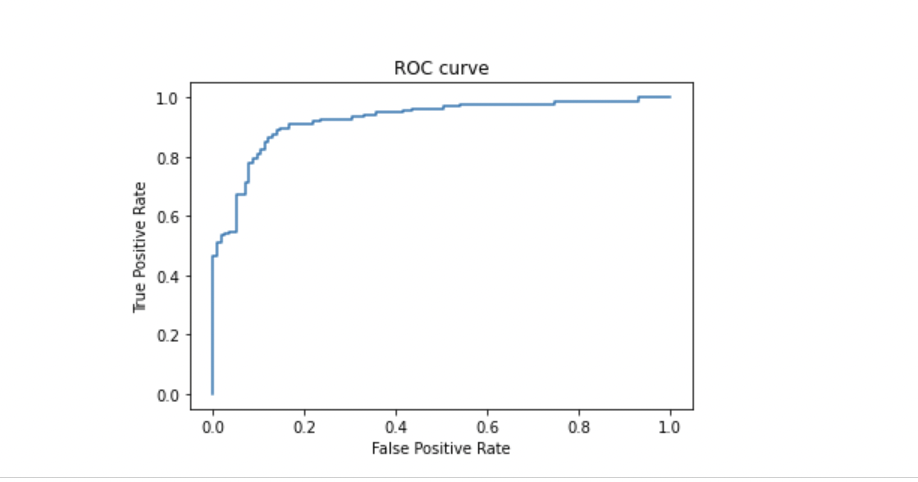

In [ ]:
# Import matplotlib, roc_auc_score and roc_curve here

...
...

y_pred_proba = ...
...
roc_auc = ...

# Plot the ROC curve
...
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc) 

### Q2.2: Calculate the FPR and TPR for Thresholds 0.5 and 0.8

We have a Logistic Regression model that gives us probability estimates for each class and we want to use the ROC curve or FPR and TPR rates to decide which threshold to set for our model.

#### TODO: Replace "None" with your Implementation
- Once again, use `.predict_proba()` to generate probabilty predictions from your model, on the test set `X_test`. You may find that the output is a 2-d array, when the expected output is 1-D. Think about how you can turn the binary case into a TP and FP case.
- This time, convert the probability values to predictions by changing the values to 1 if greater than the threshold, and 0 otherwise.
- Calculate and Append the FPR and TPR

In [ ]:
#  Generate probabilities
y_pred_proba = ...
fpr = []
tpr = []
thresholds = [0.3, 0.8]

for threshold in thresholds:
    # Generate Thresholds based upon the probabilities
    y_pred = ...

    fp = ...
    tp = ...

    fn = ...
    tn = ...
    
    # Calculate and Append the FPR
    ...
    # Calculate and Append the TPR
    ...
    

## QUIZ A

You might found this article useful: [Diagnostic Testing Accuracy: Sensitivity, Specificity, Predictive Values and Likelihood Ratios](https://www.ncbi.nlm.nih.gov/books/NBK557491/).

In [ ]:
HTML(display_quiz(f"{D6_path}A.txt"))

In [ ]:
grader.check("Quiz A")

## Q3: Grid Search with Repeated k-Folds vs k-Folds

We want to compare the use of Repeated k-Folds and k-Folds in model selection (hyperparameter selection). Our generalization estimates of 5x5 CV will certainly be different than 25-fold CV, so we will investigate this.

The `sklearn.model_selection.GridSearchCV` class can take a cross validator like `KFold` and `RepeatedKFold` as an argument, allowing us to simulatenously  compare the generalization of our model with different hyperparameters.


### Q3.1 Repeated k-Folds
Use `sklearn.model_selection.GridSearchCV`, `RepeatedKFold` and `LogisticRegression` to estimate the generalization performance of a Logistic Regression model using 5x5 k-fold cross validation across a range of hyperparameters.

Name your grid search object `clf1`.

We will only sweep 1 variable `C` in this hyperparameter selection.

#### Parameters to Sweep in GridSearchCV:
- C = $[0.01, 0.5, 10]$ (the regularization term for logistic regression)

#### RepeatedKFold Parameters:
- 5x5
- `random_state = 42`

_Tips:_ if you set the parameter `verbose` to `3`, you will be able to see the progress of the K-Fold GridSearch Progress.

In [ ]:
# Import here
...

params = ...

rkf = ...
clf1 = ...
...

# View the Grid Search CV Results
print(clf1.cv_results_)

### Q3.2 k-Folds
Use `sklearn.model_selection.GridSearchCV`, `KFold` and `LogisticRegression` to estimate the generalization performance of our model across a range of hyperparameters.

Name your grid search object `clf2`. 

We will only sweep 1 variable `C` in this hyperparameter selection.
#### Parameters to Sweep in GridSearchCV:
- C = [0.01, 0.5, 10] (the regularization term for logistic regression)

#### KFold Parameters:
- 25 folds

_Tips:_ if you set the parameter `verbose` to `3`, you will be able to see the progress of the K-Fold GridSearch Progress.

_Notes:_ it will take about 3 minutes to run depends on the DataHub. Here, we import the packages for you.

In [ ]:
from sklearn.model_selection import KFold, RepeatedKFold, GridSearchCV

params = ...

kf = ...
clf2 = ...
...



# View the Grid Search CV Results
print(clf2.cv_results_)

In [ ]:
grader.check("OLS_implementation")

### Q 3.3 Comparison

What is difference between using 5x5 Repeated k-Fold cross validation and 25-fold cross validation?

Generate three separate plots to compare the generalization estimates for each value of `C` (the grid searched hyperparameter value).

Hints:
- `clf1.cv_results_` and `clf2.cv_results_` have the validation accuracies for every split of cross validation. 
- Combine all of these results into a 25x3 matrix (25 cross validation runs, 3 hyperparameter settings for C) 
- Each column of that matrix will correspond to a value of C

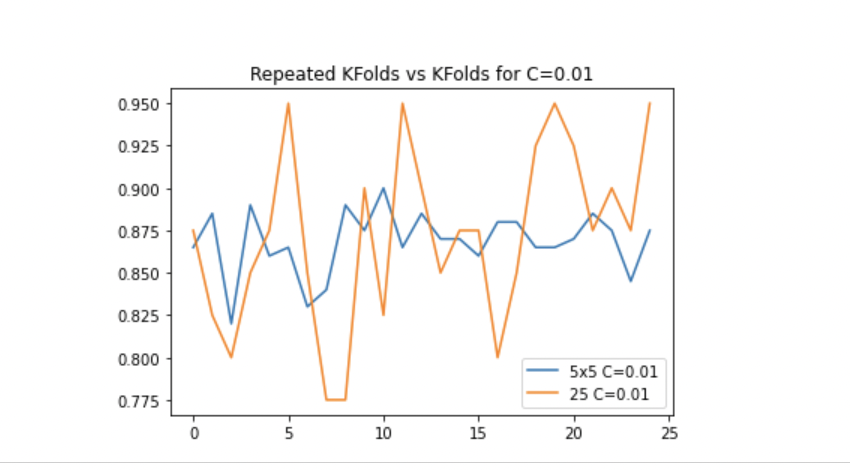

In [ ]:
...

# QUIZ B

In [ ]:
HTML(display_quiz(f"{D6_path}B.txt"))

In [ ]:
# Show your Quiz Response choices
with open("record.txt", "a+") as r:
    pass
MCQ = ["A1", "B1", "B2"]
for q in MCQ:
    show_chosen_option(q)